In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

In [12]:
#ZeroR
df = pd.read_csv('D:\\CS 325 Data Mining\\Datasets\\archive\\Heart.csv')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [13]:
df['AHD'].value_counts()

No     164
Yes    139
Name: AHD, dtype: int64

[Text(0.5, 1.0, 'ZeroR "AHD"')]

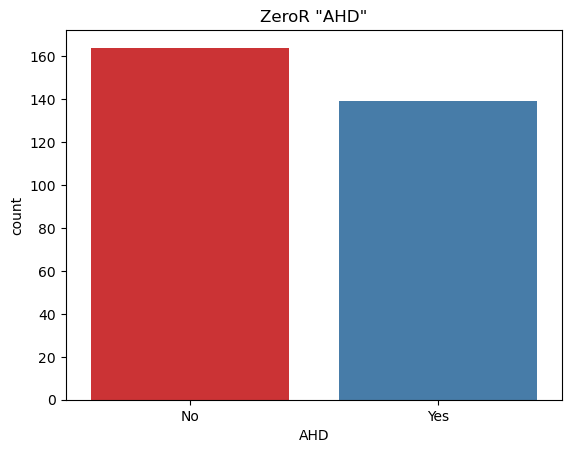

In [14]:
sns.countplot(x='AHD', data=df,palette='Set1').set(
title='ZeroR "AHD"')

------------------------------ZeroR---------------------------------
Accuracy: %54.13
--------------------------------------------------------------------
F1 Score: 0.70
--------------------------------------------------------------------
Specificity: 1.00
--------------------------------------------------------------------
Sensitivity: 0.00
--------------------------------------------------------------------
Classification Report:
              precision  recall  f1-score  support
No                 0.54    1.00      0.70   164.00
Yes                1.00    0.00      0.00   139.00
accuracy           0.54    0.54      0.54     0.54
macro avg          0.77    0.50      0.35   303.00
weighted avg       0.75    0.54      0.38   303.00
--------------------------------------------------------------------


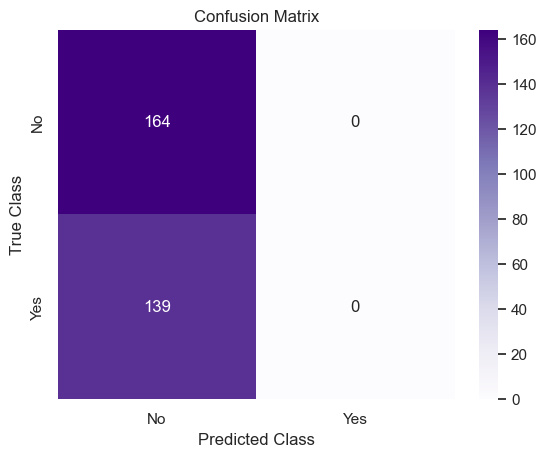

In [27]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = pd.read_csv('D:\\CS 325 Data Mining\\Datasets\\archive\\Heart.csv')

target_variable = 'AHD'

# Calculate the most frequent class in the target variable
most_frequent_class = df[target_variable].mode()[0]

# Make predictions by assigning the most frequent class to all instances
predictions = [most_frequent_class] * len(df)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(df[target_variable], predictions)

# Calculate the F1 score
f1_score = f1_score(df[target_variable], predictions, pos_label=most_frequent_class, zero_division=1)

# Calculate the accuracy
accuracy = accuracy_score(df[target_variable], predictions)

# Generate classification report
report = classification_report(df[target_variable], predictions, target_names=['No', 'Yes'], output_dict=True, zero_division=1)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.round(2)

tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

print("------------------------------ZeroR---------------------------------")
print(f'Accuracy: %{accuracy*100:.2f}')
print("--------------------------------------------------------------------")
print(f'F1 Score: {f1_score:.2f}')
print("--------------------------------------------------------------------")
print(f'Specificity: {specificity:.2f}')
print("--------------------------------------------------------------------")
print(f'Sensitivity: {sensitivity:.2f}')
print("--------------------------------------------------------------------")
print("Classification Report:")
print(df_report)
print("--------------------------------------------------------------------")

# Plot the confusion matrix
sns.set(font_scale=1)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 12}, cmap='Purples', fmt='g', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()
